** NumPy básico **

** Ejercicio 1 **
- Crea un array de 45 enteros aleatorios entre -10 y 10.
- Redimensiónalo como matriz de 5x7
- Obtén los números positivos de esa matriz utilizando boolean indexing.
- Obtén con una función los datos no duplicados.
- Sobre los datos no duplicados, obtén la media.


In [94]:
import numpy as np
from numpy.random import *

#Creación del array
arRndInts = np.random.randint(-10, 10, 45)
#Redimensionamiento
mt = arRndInts.reshape( (5,9) )
#Números positivos
arPos = mt[mt > 0]
#Datos no duplicados
arUnique = np.unique(arPos)
uno_media = arUnique.mean()
print(arUnique)
print("Ejercicio 1. Media: " + str(uno_media))

#Referencias
#http://www.biochem-caflisch.uzh.ch/zhou/Numpy_Example_List_With_Doc.html#head-2d0ff9e99658f2704b70bf3e876f695f3627a246


[1 2 3 4 5 6 7 8 9]
Ejercicio 1. Media: 5.0


** Ejercicio 2 **
- Crea dos arrays de 100 elementos con números aleatorios de
distribuciones diferentes, pero en un rango de valores similar.
- Dibuja sus histogramas y compáralos.
- Busca en scypy.stats una función para hacer una comprobación
(mediante un t-test) de si la media de los elementos en los dos arrays es
diferente.

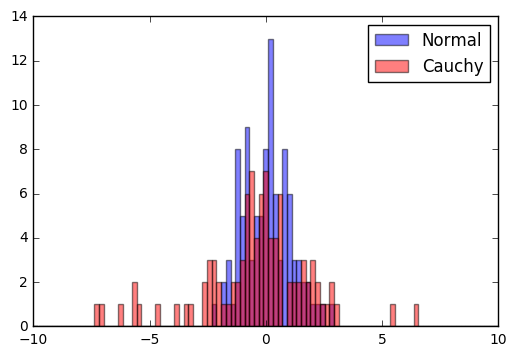

Las medias son idénticas [0.435840203722]


In [95]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
#from scipy.stats import norm
from scipy import stats

#Plot en el notebook
%matplotlib inline

#Creación de los arrays
#Muestras normales de media 0 y desv. estándar 1
arNormal = nr.normal(loc=0.0, scale=1.0, size=100)
#Muestras de la distribución de Cauchy x_0=0 and \gamma=1
arCauchy = nr.standard_cauchy(size=100)

#Histogramas

bins = np.linspace(-10, 10, 100)

plt.hist(arNormal, bins, alpha=0.5, label='Normal', color = 'blue')
plt.hist(arCauchy, bins, alpha=0.5, label='Cauchy', color = 'red')
plt.legend(loc='upper right')
plt.show()

#t-test sobre si la media de los dos arrays es diferente
#This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.
#This test assumes that the populations have identical variances by default.
statistic, pvalue = stats.ttest_ind(arNormal,arCauchy)

#The test measures whether the average (expected) value differs significantly across samples.
#If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis
#of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%,
#then we reject the null hypothesis of equal averages.

threshold = 0.05
if pvalue >= threshold:
    print("Las medias son idénticas [" + str(pvalue) + "]")
else:
    print("Rechazada la hipótesis nula [" + str(pvalue) + "]")
    
#Referencias
#http://stackoverflow.com/questions/10138085/python-pylab-plot-normal-distribution
#http://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

** Ejercicio 3. **

- Si no lo conocías, lee el ejemplo de qué es una media móvil aquí:
http://www.investopedia.com/terms/m/movingaverage.asp
(consideramos solo las medias móviles simples)
- Genera un array de supuesta cotizaciones de un valor de la bolsa
duante un período. Nota: Puedes simularlo con un “random walk” a partir
de un valor de cotización inicial

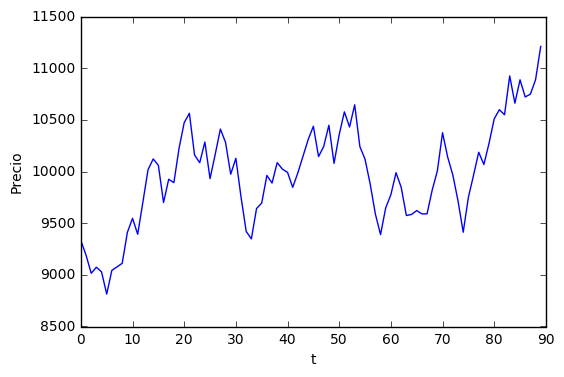

In [96]:
import numpy as np
from numpy.random import randint, uniform
from random import normalvariate
import matplotlib.pyplot as plt

#Cálculo del array de cotizaciones
#3 meses
max_t = 90
#Cotización inicial
cotInicial = 9330.8
#Máxima variación (4%)
delta = 0.04

cotizaciones = [cotInicial]

#Se añaden las cotizaciones al vector
for i in range(1, max_t):
    sube_baja = np.random.randint(0, 2)              # 0:baja acción; 1: sube acción
    variacion = np.random.uniform(low=0, high=delta) # variación aleatoria hasta un cierto máximo
    if sube_baja == 0:
        cotizaciones.append(round(cotizaciones[i-1] * (1 - variacion), 2))
    else:
        cotizaciones.append(round(cotizaciones[i-1] * (1 + variacion), 2))

#print(cotizaciones)

# Plot sobre el notebook
%matplotlib inline

# Visualizamos historial de cotizacion del valor bursatil
plt.plot(cotizaciones) 
plt.xlabel('t')
plt.ylabel('Precio')

#Referencias
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
#http://sphelps.net/teaching/random-walks-slides.html#/2
#Notebook Raúl Vigo

- Busca una función en NumPy que implemente la media móvil y aplícalo
a los datos generados.

[  9330.8     9190.65    9015.04    9073.64    9028.62    8813.89    9043.82
   9076.78    9111.76    9109.559   9131.19    9151.358   9220.174
   9314.496   9423.785   9548.362   9613.989   9698.819   9776.85
   9858.207   9950.75   10067.881  10113.561  10120.362  10136.74
  10123.891  10170.449  10219.036  10258.009  10232.971  10198.481
  10117.26   10043.283   9969.613   9905.259   9881.575   9861.203
   9808.936   9789.337   9794.285   9780.68    9790.211   9846.959
   9927.029   9993.903  10068.222  10086.464  10121.892  10158.088
  10163.685  10200.242  10273.289  10317.608  10367.288  10360.304
  10328.449  10301.729  10236.278  10130.468  10087.333  10029.157
   9970.275   9911.845   9804.662   9739.062   9689.348   9660.621
   9660.822   9703.896   9739.806   9799.779   9814.751   9826.524
   9840.548   9823.304   9836.1     9873.481   9933.138   9957.841
   9984.482   9997.918  10043.928  10102.391  10223.488  10348.397
  10462.153  10537.907  10594.102  10676.047  10769.74

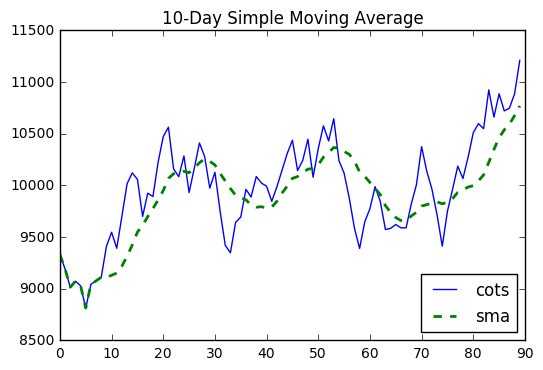

In [97]:
# Funcion con la q trabajamos para generar media móvil
from numpy import cumsum

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

n = 10
sma_aux = moving_average(cotizaciones, n)
#print(len(sma_aux)) max_t - n + 1

#De los primeros n dias se desconoce la media móvil, por lo que se asume un valor inicial
sma_n = np.empty(max_t, dtype=float)
for i in range(n):
    sma_n[i] = cotizaciones[i]

sma_n[n - 1:] = sma_aux
print(sma_n)

plt.plot(cotizaciones, label="cots")
plt.plot(sma_n, "--", label="sma", lw=2.0)
#plt.plot(sma3, "--", label="sma-3d")

#sma10 = moving_average(cotizaciones, 20)
#plt.plot(sma10, label="sma-20d")

plt.title("%d-Day Simple Moving Average" %n)
plt.legend(loc='lower right')

#Referencias
#http://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
#https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.cumsum.html


In [98]:
#Tiempo que tarda usando numpy
%timeit moving_average(cotizaciones, n)
#n = 30 -> 13.3 µs per loop
#n = 15 -> 13.5 µs per loop
#n = 10 -> 13.1 µs per loop
#n = 5 -> 13.2 µs per loop
#n = 3 -> 13.1 µs per loop

The slowest run took 5.23 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.6 µs per loop


- Ahora haz tu propia implementación de la media móvil utilizando arrays
de NumPy.
Compara la eficiencia de tu versión y la de NumPy.
- (**) Investiga cómo obtener datos reales de un valor de la bolsa a partir
de Yahoo Financials (si no lo consigues por programa, puedes
descargarlo a un fichero a mano y leerlo después), y aplica la media
móvil.

In [101]:
# Otra forma de obtener la media móvil: operando con ndarrays (Raúl Vigo)

def np_sma (x,N): # x: datos; N-day moving-average
    a = np.zeros((N, len(x) - N + 1)) # Definimos e inicializamos array de trabajo; dimensiones f(len(x),N)
    #i=0
    # Nos desplazamos sobre la lista y cogemos bloques
    for i in range(N):
        a[i] = np.array(x[i:len(x)-N+i+1])

    print(a.shape) #Ej: para N= 10, max_t=90 -> (10,81)
    # Sumamos los bloques y hallamos la media
    return sum(a)/N 

# Ejecutamos y visualizamos la función, comprabando q el resultado es el mismo q el anterior
sma_2 = np_sma(cotizaciones, n)
print(sma_2)

#Referencias
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html

(10, 81)
[  9109.559   9131.19    9151.358   9220.174   9314.496   9423.785
   9548.362   9613.989   9698.819   9776.85    9858.207   9950.75
  10067.881  10113.561  10120.362  10136.74   10123.891  10170.449
  10219.036  10258.009  10232.971  10198.481  10117.26   10043.283
   9969.613   9905.259   9881.575   9861.203   9808.936   9789.337
   9794.285   9780.68    9790.211   9846.959   9927.029   9993.903
  10068.222  10086.464  10121.892  10158.088  10163.685  10200.242
  10273.289  10317.608  10367.288  10360.304  10328.449  10301.729
  10236.278  10130.468  10087.333  10029.157   9970.275   9911.845
   9804.662   9739.062   9689.348   9660.621   9660.822   9703.896
   9739.806   9799.779   9814.751   9826.524   9840.548   9823.304   9836.1
   9873.481   9933.138   9957.841   9984.482   9997.918  10043.928
  10102.391  10223.488  10348.397  10462.153  10537.907  10594.102
  10676.047  10769.74 ]


In [100]:
# ¿Cuánto tarda en ejecutarse? Debería ser superior que empleando una función más adecuada u optimizada
%timeit(np_sma(cotizaciones, n))
# n=10 -> 14ms

[[  9330.8    9190.65   9015.04   9073.64   9028.62   8813.89   9043.82
    9076.78   9111.76   9410.59   9547.11   9392.33   9703.2   10016.86
   10121.51  10059.66   9700.09   9925.08   9892.07  10224.16  10472.54
   10563.64  10160.    10084.87  10285.29   9931.17  10165.67  10410.95
   10281.8    9973.78  10127.64   9751.43   9420.23   9348.17   9641.75
    9694.33   9961.95   9888.28  10085.81  10023.26   9991.59   9846.74
    9987.71  10148.87  10310.49  10437.52  10144.37  10242.56  10447.77
   10079.23  10357.16  10577.21  10430.9   10645.67  10240.65  10118.97
    9877.17   9588.05   9389.67   9647.88   9775.4    9988.39   9846.6
    9573.84   9584.65   9621.83   9589.9    9590.06   9820.41  10006.98
   10375.13  10138.11   9964.33   9714.08   9412.21   9749.79   9963.71
   10186.63  10067.44  10273.39  10509.49]
 [  9190.65   9015.04   9073.64   9028.62   8813.89   9043.82   9076.78
    9111.76   9410.59   9547.11   9392.33   9703.2   10016.86  10121.51
   10059.66   9700.09 